In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# handling imbalanced datasets and performing resampling techniques
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding="ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [8]:
df.duplicated().sum()

403

In [9]:
df= df.drop_duplicates()

In [10]:
df.rename(columns={'v1':'Target', 'v2':'Text'},inplace=True)

In [11]:
encoder=LabelEncoder()
df['Target']=encoder.fit_transform(df['Target'])


In [12]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


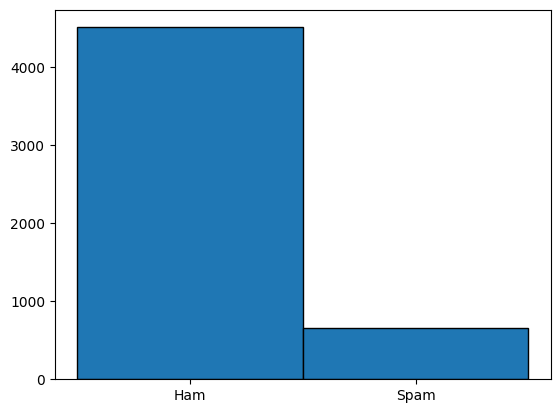

In [13]:
plt.hist(df['Target'], bins=2, edgecolor='black')
plt.xticks([0.25, 0.75], ['Ham', 'Spam'])
plt.show()

> **Data Preprocessing**

**Function to process text**

In [14]:
x = df['Text']
y = df['Target']

In [15]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

x_extraction = feature_extraction.fit_transform(x)

In [16]:
# data splitting, model evaluation metrics, cross-validation, hyperparameter tuning, and classification performance
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

from sklearn.linear_model import LogisticRegression

In [17]:
# Performing oversampling and undersampling using SMOTE and RandomUnderSampler techniques to address class imbalance

over = SMOTE(sampling_strategy = 1)
under = RandomUnderSampler(sampling_strategy = 0.4)
f1 = x_extraction
t1 = y

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 1632, 1: 1632})

In [18]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size=0.3, random_state=101)

In [19]:
# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(x_train, y_train)


LogisticRegression()

In [20]:
y_pred = logistic_model.predict(x_test)

In [21]:
# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[500   4]
 [ 25 451]]


In [22]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       504
           1       0.99      0.95      0.97       476

    accuracy                           0.97       980
   macro avg       0.97      0.97      0.97       980
weighted avg       0.97      0.97      0.97       980



In [23]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.9704081632653061
